# II. HÁZI FELADAT

Ezt a feladatsort tetszőleges programozási nyelven meg lehet oldani, de a forráskódot minden esetben mellékelni kell. A python és octave megoldások programkódja kerülhet a jupyter notebookba. A programok legyenek modulárisak, használjanak függvényeket! A kimeneti adatok ábrázolásához minden esetben használjuk a jupyter notebookot! Az ábrák legyenek áttekinthetőek, és szerepeljen rajtuk tengelyfelirat!

# Oszcillátorok numerikus vizsgálata

$$ \def\dd{{\textrm{d}}} $$

Oszcillátoroknak olyan dinamikai rendszereket nevezünk, melyek mozgása az idő periodikus vagy kvázi-periodikus függvényeként írható le. Az egydimenziós oszcillátor mozgásegyenlete

$$ m \frac{\dd^2x}{\dd t^2} = - \frac{\dd V(x)}{\dd x} $$

alakban írható. Egy szabad oszcillátor teljes energiája mindaddig megmarad, amíg a rendszerben nem hat súrlódási erő (csillapított oszcillátor), illetve nem hatunk rá külső erővel (gerjesztett oszcillátor). Az oszcillátor teljes energiája a kinetikus és a potenciális energia összege, azaz

$$ E_{\textrm{tot}} = \frac{m v^2}{2} + V(x)$$

## Harmonikus oszcillátor

Amennyiben a $V(x)$ potenciál négyzetes, abban az esetben harmonikus oszcillátorról beszélünk:

$$\begin{eqnarray}
    V(x) & = & \frac{1}{2}kx^2 \\
    m \frac{\dd^2x}{\dd t^2} & = & - k x.
\end{eqnarray}$$

A harmonikus oszcillátor mozgásegyenlete analitikusan is megoldható. A megoldás

$$ x(t) = A \cos( \omega t + \phi ) $$

alakú, ahol $A$ az amplitúdó - vagyis a legnagyobb kitérés -, $\omega$ a körfrekvencia és $\phi$ a kezdőfázis $t = 0$-ban. A harmonikus oszcillátor körfrekvenciáját a potenciálban szereplő $k$ állandó és az $m$ tömeg jellgű mennyiség határozza meg:

$$ \omega = \sqrt{\frac{k}{m}} = \frac{2\pi}{T}, $$

ahol $T$ a pediódusidő, melyből $f = 1/T$ módon kaphatjuk meg a frekvenciát.

## Anharmonikus oszcillátor

Az anharmonikus abban különböznek a harmonikus oszcillátortól, hogy a mozgásukat meghatározó potenciál nem négyzetes alakú. Néhány lehetséges anharmonikus potenciál:

* Negyedrendű potenciál

$$ V(x) = \frac{1}{4}kx^4 $$

* Lennard-Jones potenciál

$$ V(x) = V_0 \left[ \left( \frac{x_0}{x} \right)^{12} - 2 \left( \frac{x_0}{x} \right)^{6} \right] $$

## Csillapított és gerjesztett oszcillátor

A csillapított és/vagy gerjesztett oszcillátorok mozgásegyenletében megjelenik egy sebességtől függő és egy további, többnyire időfüggő külső erőtag is:

$$ m \frac{\dd^2x}{\dd t^2} = - \frac{\dd V(x)}{\dd x} - c \frac{\dd x}{\dd t} + F(t) $$

Csillapított és szinuszosan gerjesztett oszcillátorok viselkedése analitikusan is egyszerűen vizsgálható. Az alábbi feladatokban ezért ezektől eltérő rendszereket vizsgálunk numerikus módszerek segítségével.

# Feladatok

## 1. feladat

Számítsuk ki a fent felírt két anharmonikus potenciálhoz tartozó erőt.

#### Negyedrendű potenciál
$$ V(x) = \frac{1}{4}kx^4 $$
Így a hozzá tartozó erő $$F_{(x)} = - kx^3 $$

#### Lennard-Jones potenciál
$$ V(x) = V_0 \left[ \left( \frac{x_0}{x} \right)^{12} - 2 \left( \frac{x_0}{x} \right)^{6} \right] $$
Így a hozzá tartozó erő 
$$ F(x) = 12V_0 \left[ \left( \frac{x_0^{5}}{x^{3}} \right) - \left ( \frac{x_0^{11}}{x^{9}} \right) \right] $$

## 2. feladat

Írjunk olyan függvényeket, melyek kiszámítják a harmonikus potenciált, az ehhez tartozó erőt, illetve az 1. feladatban felírt anharmonikus potenciálokat és erőket. Ábrázoljuk a potenciálokat és az erőket grafikonon!

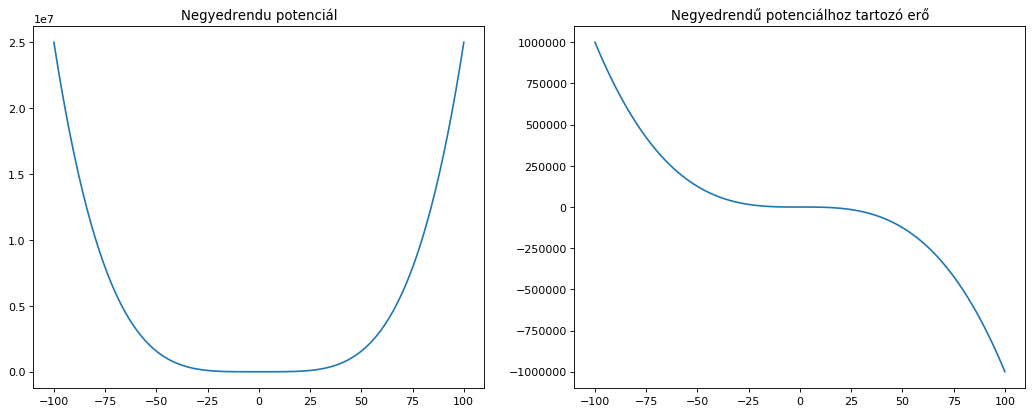

In [45]:
import matplotlib.pyplot as plt
import numpy as np

def negyedrendo_pot_ero(x, n):
    x = np.linspace(x[0],x[1],n)
    yV = (1/4)*1*x**4;
    yF = - x**3;
    plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.xlabel('Távolság', fontsize = '12')
    plt.ylabel('Potenciál', fontsize = '12')
    
    plt.subplot(1,2,1)    
    plt.title('Negyedrendu potenciál')
    plt.plot(x,yV, linestyle='-', label='')
    plt.subplot(1,2,2)
    plt.title('Negyedrendű potenciálhoz tartozó erő')
    plt.plot(x,yF, linestyle='-')
    
negyedrendo_pot_ero([-100, 100], 100)

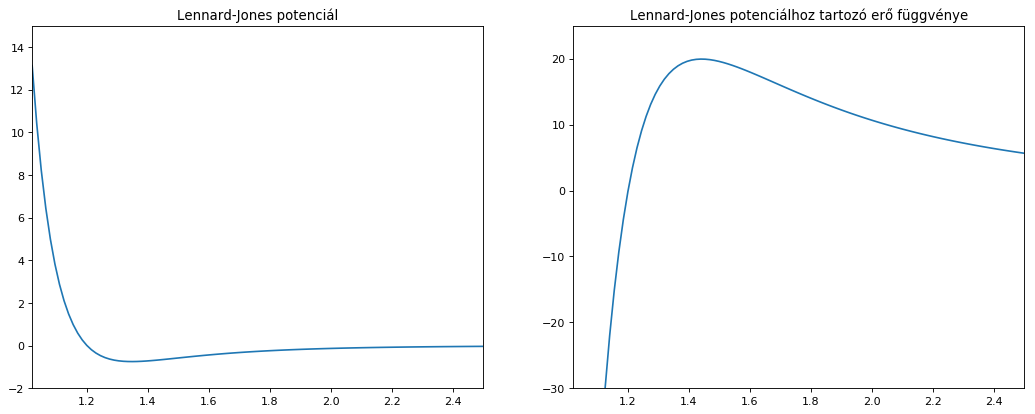

In [46]:
def lennardjones_pot_ero(x, n, x0, v0):
    x = np.linspace(x[0],x[1],n)
    yV = v0*(((x0/x)**12)-(x0/x)**6);
    yF = 12*v0*(((x0**5/x**3)-(x0**11/x**9)));
    plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.xlabel('Távolság', fontsize = '12')
    plt.ylabel('Potenciál', fontsize = '12')
    
    plt.subplot(1,2,1)    
    plt.title('Lennard-Jones potenciál')
    plt.xlim(1.02,2.5)
    plt.ylim(-2,15)
    plt.plot(x,yV, linestyle='-')
    plt.subplot(1,2,2)
    plt.title('Lennard-Jones potenciálhoz tartozó erő függvénye')
    plt.xlim(1.02,2.5)
    plt.ylim(-30,25)
    plt.plot(x,yF, linestyle='-')
    
lennardjones_pot_ero([1.02, 2.5], 100, 1.2, 3)

## 3. feladat

Integráljuk a harmonikus és Lennard-Jones-potenciállal meghatározott oszcillátorok mozgásegyenletét egyszerű negyed rendű Runge-Kutta-módszerrel vagy a Dormand-Prince-féle 5(4)-ed rendű, adaptív lépéshossz-választásos módszerrel. Az integráláshoz használjunk szabadon elérhető programcsomagot, pl.:

* python: scipy.integrate.RK45
* octave: ode45
* C: GSL ODE csomag
* C++: Boost.Numeric.Odeint csomag

Ábrázoljuk az egyenlet változóinak időfejlődését, a teljes energiát és a lépéshosszt az idő függvényében!

In [ ]:
# megoldás helye

## 4. feladat

Interpoláljuk a 3. feladatból kapott megoldásokat időben egyenletes lépésközzel, lineárisan és köbös spline-ok segítségével!

In [ ]:
# megoldás helye

## 5. feladat

Számítsuk ki, és ábrázoljuk a felprogramozott oszcillátorok Fourier-spektrumát. Mit figyelhetünk meg?

In [ ]:
# megoldás helye

## 6. feladat

Programozzunk be kaotikus oszcillátort!$^1$ Egy szinuszosan gerjesztett oszcillátor esetében a kaotikus viselkedés feltétele, hogy a visszatérítő erő ne lineáris függvénye legyen a kitérésnek. Ábrázoljuk a kitérés és a sebesség időfüggését, valamint a teljesítményspektrumot! Futassuk az integrálást legalább 1 millió lépésig, és ábrázoljuk a rendszer Poincaré-metszetét, azaz a sebességet a kitérés függvényében az $\omega t = n \cdot 2 \pi, n = 1, 2, 3, ... $ feltétel mellett!

$^1$ http://sprott.physics.wisc.edu/pubs/paper265.pdf